In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Quedtion 01
#Intensity Transformation
# Import Emma image
emma = cv.imread(r'D:\ACA\sem 5\vision\assignment 1\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

Lookup Table Shape: (256,)


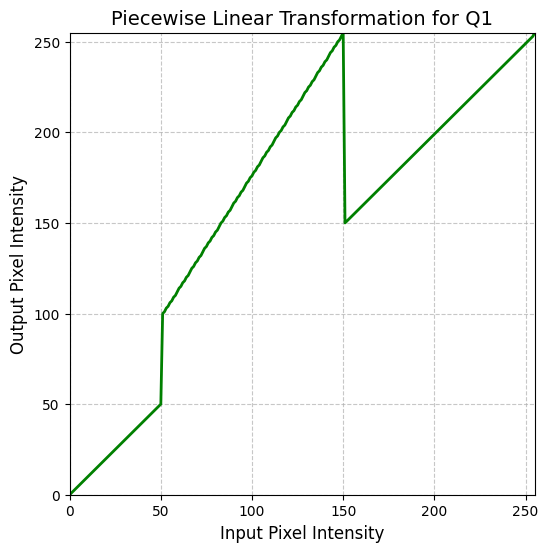

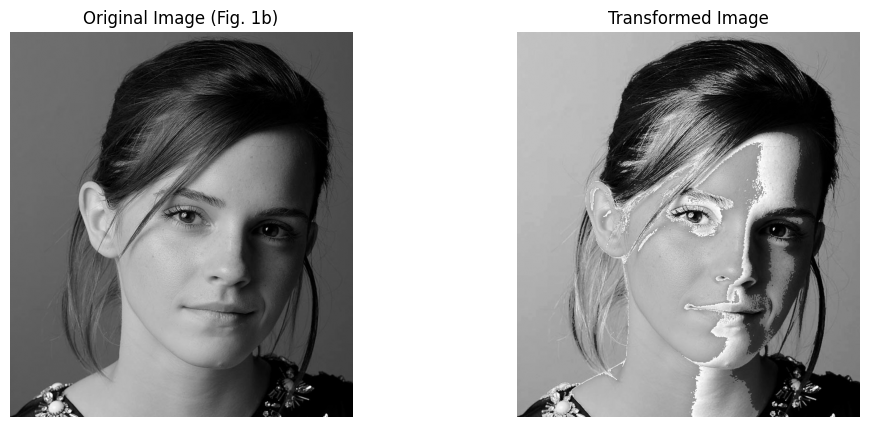

In [22]:
# Create a piecewise linear transformation for intensity mapping
# Segment 1: Maps 0-50 to 0-50 (no change for low intensities)
# Segment 2: Maps 51-150 to 100-255 (stretches mid-range intensities)
# Segment 3: Maps 151-255 to 150-255 (compresses high intensities)
segment_low = np.linspace(0, 50, num=51).astype(np.uint8)  # First 51 intensities
segment_mid = np.linspace(100, 255, num=100).astype(np.uint8)  # Next 100 intensities
segment_high = np.linspace(150, 255, num=105).astype(np.uint8)  # Last 105 intensities

# Combine segments into a 256-element LUT
intensity_lut = np.concatenate((segment_low, segment_mid, segment_high), axis=0).astype(np.uint8)

# Verify the LUT has 256 values for all input intensities (0-255)
print(f"Lookup Table Shape: {intensity_lut.shape}")

# Plot the transformation curve
plt.figure(figsize=(6, 6))
plt.plot(intensity_lut, color='green', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Piecewise Linear Transformation for Q1", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q1_transform_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Apply the piecewise transformation using the LUT
transformed_image = cv.LUT(emma, intensity_lut)

# Visualize original and transformed images side by side
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.title("Original Image (Fig. 1b)", fontsize=12)
plt.axis('off')
plt.subplot(122)
plt.imshow(transformed_image, cmap='gray')
plt.title("Transformed Image", fontsize=12)
plt.axis('off')
plt.savefig('q1_image_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
#Question 02
#Intensity Transformation to Accenuate White Matter and Gray Matter
# Import brain image
brain = cv.imread(r'D:\ACA\sem 5\vision\assignment 1\a1images\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

Gray Matter LUT Shape: (256,)
White Matter LUT Shape: (256,)


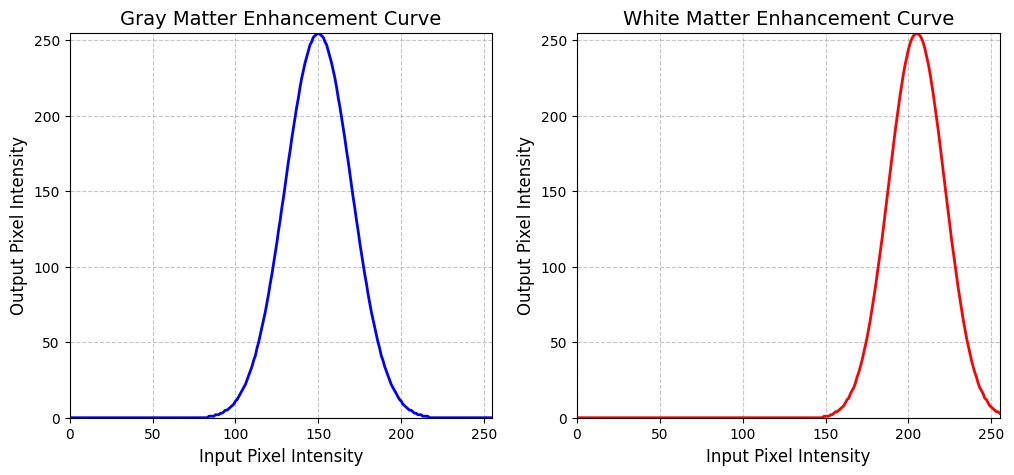

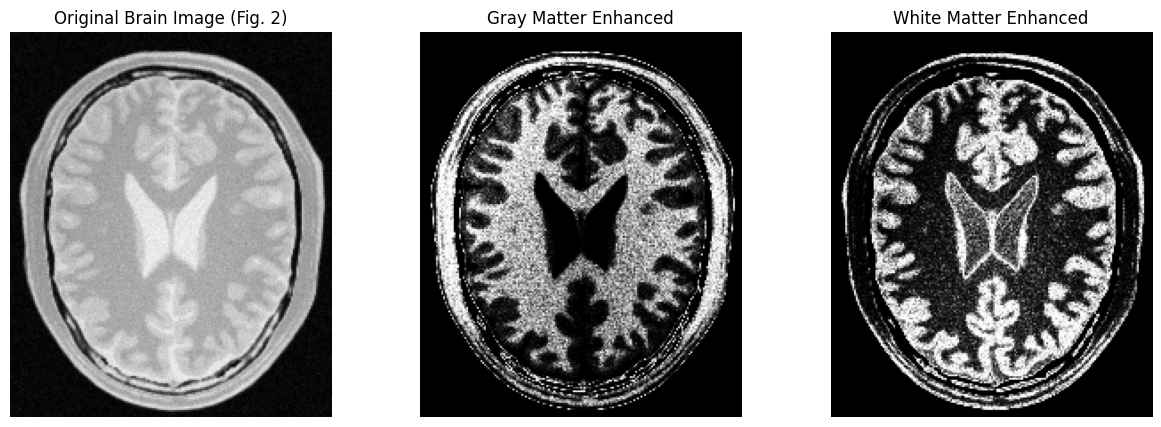

In [25]:
# Create transformation for gray matter using a Gaussian pulse
# Centers at intensity 150 to boost mid-range intensities (gray matter)
gray_center = 150  # Mean of Gaussian, targeting gray matter
gray_spread = 20  # Standard deviation for Gaussian spread
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)
gray_lut = 255 * np.exp(-((input_intensities - gray_center)**2) / (2 * gray_spread**2))  # Gaussian pulse
gray_lut = np.clip(gray_lut, 0, 255).astype(np.uint8)  # Clip to valid intensity range [0, 255]

# Create transformation for white matter using a Gaussian pulse
# Centers at intensity 200 to boost mid-range intensities (gray matter)
white_center = 205  # Mean of Gaussian, targeting gray matter
white_spread = 17  # Standard deviation for Gaussian spread
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)
white_lut = 255 * np.exp(-((input_intensities - white_center)**2) / (2 * white_spread**2))  # Gaussian pulse
white_lut = np.clip(white_lut, 0, 255).astype(np.uint8)  # Clip to valid intensity range [0, 255]

# Verify transformation array shapes
print(f"Gray Matter LUT Shape: {gray_lut.shape}")
print(f"White Matter LUT Shape: {white_lut.shape}")

# Plot both transformation curves
plt.figure(figsize=(12, 5))
# Plot for gray matter transformation
plt.subplot(121)
plt.plot(input_intensities, gray_lut, color='blue', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Gray Matter Enhancement Curve", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
# Plot for white matter transformation
plt.subplot(122)
plt.plot(input_intensities, white_lut, color='red', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("White Matter Enhancement Curve", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q2_transform_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Apply transformations to enhance gray and white matter
gray_enhanced = cv.LUT(brain, gray_lut)  # Apply Gaussian transform for gray matter
white_enhanced = cv.LUT(brain, white_lut)  # Apply linear transform for white matter

# Visualize original and enhanced images
plt.figure(figsize=(15, 5))
# Original image
plt.subplot(131)
plt.imshow(brain, cmap='gray', vmin=0, vmax=255)
plt.title("Original Brain Image (Fig. 2)", fontsize=12)
plt.axis('off')
# Gray matter enhanced
plt.subplot(132)
plt.imshow(gray_enhanced, cmap='gray', vmin=0, vmax=255)
plt.title("Gray Matter Enhanced", fontsize=12)
plt.axis('off')
# White matter enhanced
plt.subplot(133)
plt.imshow(white_enhanced, cmap='gray', vmin=0, vmax=255)
plt.title("White Matter Enhanced", fontsize=12)
plt.axis('off')
plt.savefig('q2_image_results.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
#Question 03
#Applying Gamma Correction to the L plane 
#Import the image
img_q3_bgr = cv.imread(r'D:\ACA\sem 5\vision\assignment 1\a1images\highlights_and_shadows.jpg')
assert img_q3_bgr is not None
img_q3_lab = cv.cvtColor(img_q3_bgr, cv.COLOR_BGR2LAB)
img_q3_rgb = cv.cvtColor(img_q3_bgr, cv.COLOR_BGR2RGB)

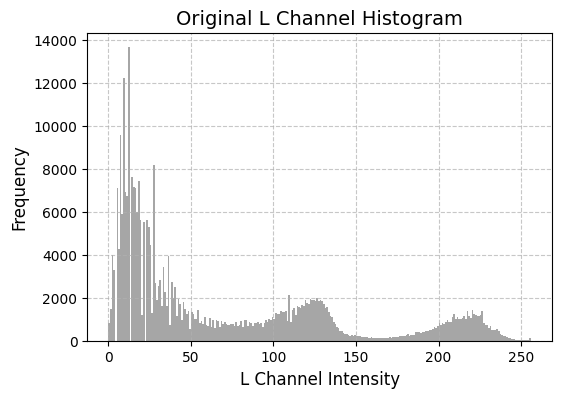

In [28]:
#Observing the histogram of the L plane
# Extract L, A, B channels from LAB image
l_original, a_channel, b_channel = cv.split(img_q3_lab)  # Split LAB image into L, A, B channels

# Plot histogram of original L channel to guide gamma selection
plt.figure(figsize=(6, 4))
plt.hist(l_original.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel("L Channel Intensity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Original L Channel Histogram", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q3_l_histogram_original.png', dpi=300, bbox_inches='tight')
plt.show()

Gamma LUT Shape (γ=0.3): (256,)
Gamma LUT Shape (γ=0.5): (256,)
Gamma LUT Shape (γ=0.7): (256,)
Gamma LUT Shape (γ=1.5): (256,)
Gamma LUT Shape (γ=2.0): (256,)
Gamma LUT Shape (γ=3.0): (256,)


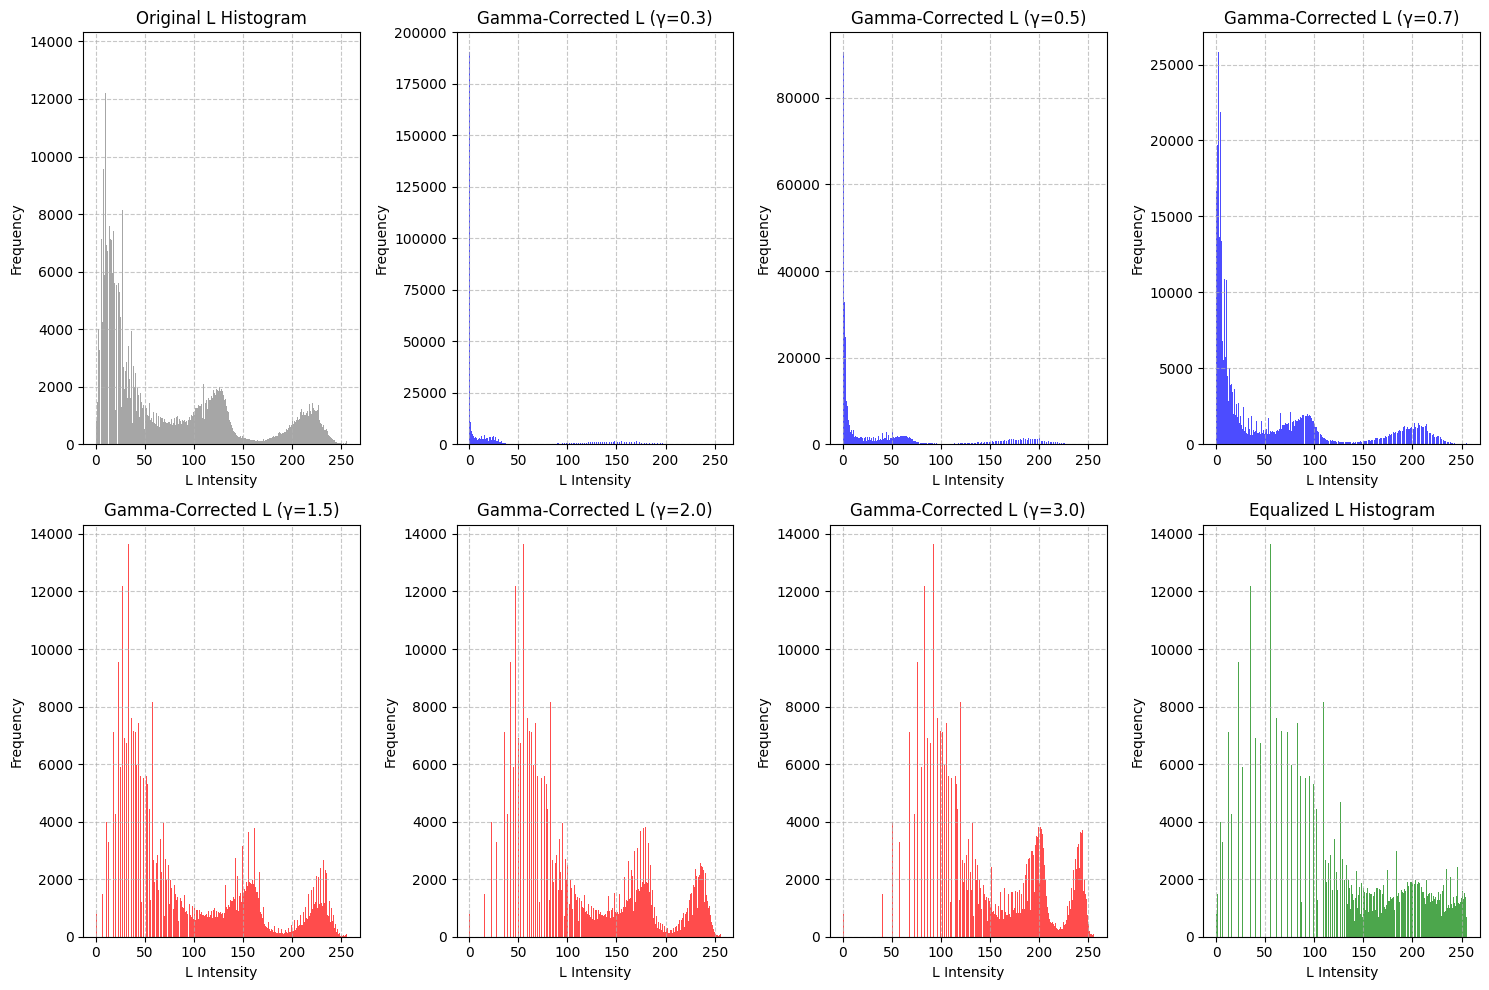

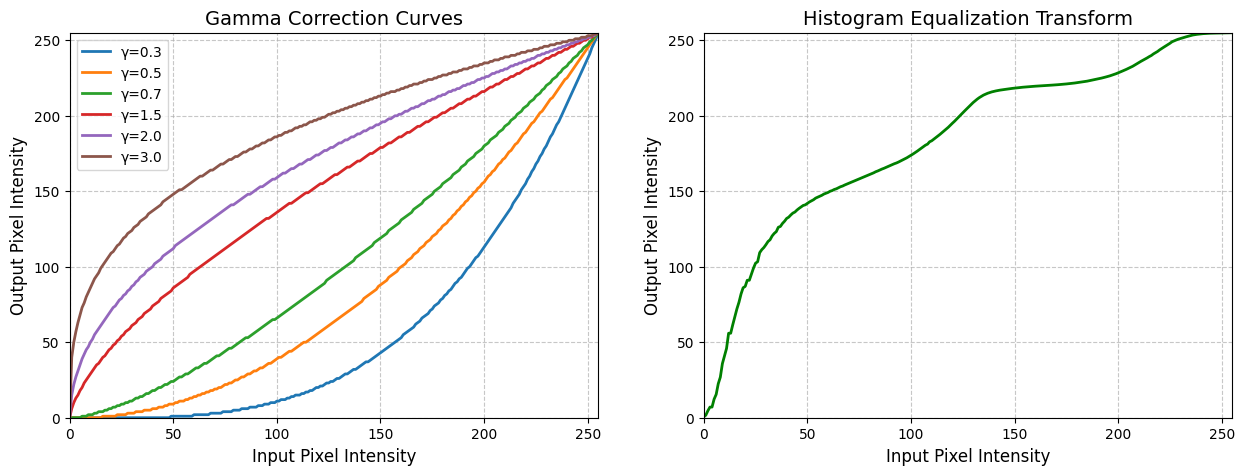

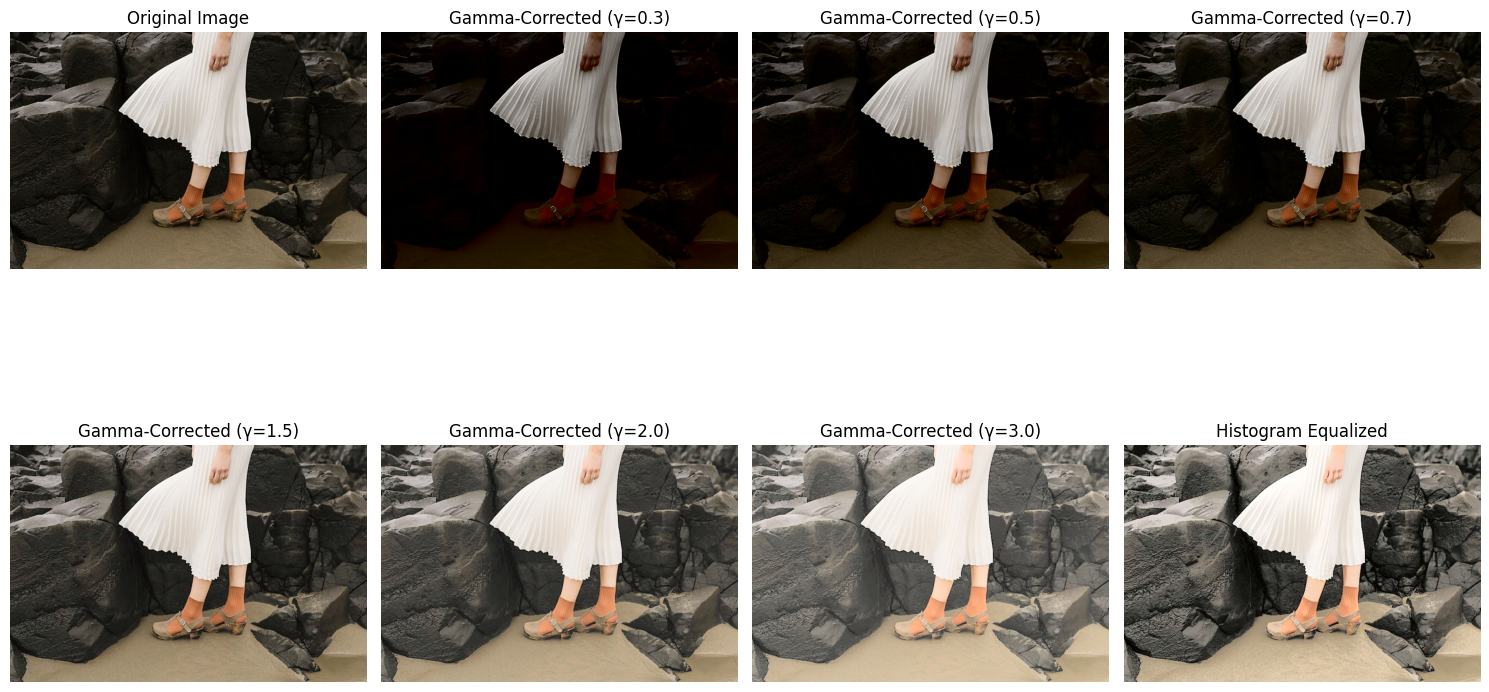

In [29]:
# Define input intensities for gamma correction LUTs
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)

# Define gamma values to test for histogram flattening
gamma_values = [0.3, 0.5, 0.7, 1.5, 2.0, 3.0]  # Test for shadows (γ<1) and highlights (γ>1)
gamma_luts = []
l_gamma_corrected = []
for gamma in gamma_values:
    lut = 255 * np.power(input_intensities / 255.0, 1.0 / gamma)  # Gamma correction formula
    lut = np.clip(lut, 0, 255).astype(np.uint8)  # Clip to valid range
    gamma_luts.append(lut)
    l_gamma_corrected.append(cv.LUT(l_original, lut))  # Apply gamma correction to L channel
    print(f"Gamma LUT Shape (γ={gamma}): {lut.shape}")

# Apply histogram equalization for reference
l_equalized = cv.equalizeHist(l_original)  # Equalize L channel to flatten histogram

# Plot histograms of original, gamma-corrected, and equalized L channels
plt.figure(figsize=(15, 10))
# Original L histogram
plt.subplot(241)
plt.hist(l_original.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel("L Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Original L Histogram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Gamma-corrected histograms
for i, gamma in enumerate(gamma_values):
    plt.subplot(242 + i)
    plt.hist(l_gamma_corrected[i].ravel(), bins=256, range=[0, 256], color='blue' if gamma < 1 else 'red', alpha=0.7)
    plt.xlabel("L Intensity", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.title(f"Gamma-Corrected L (γ={gamma})", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
# Equalized L histogram
plt.subplot(248)
plt.hist(l_equalized.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.xlabel("L Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Equalized L Histogram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('q3_l_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot transformation curves for gamma corrections and equalization
plt.figure(figsize=(15, 5))
# Gamma correction curves
plt.subplot(121)
for i, gamma in enumerate(gamma_values):
    plt.plot(input_intensities, gamma_luts[i], label=f'γ={gamma}', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Gamma Correction Curves", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
# Equalization transformation curve
hist, bins = np.histogram(l_original.ravel(), bins=256, range=[0, 256])
cdf = hist.cumsum()  # Compute cumulative distribution function
cdf_normalized = cdf * 255 / cdf[-1]  # Normalize to [0, 255]
plt.subplot(122)
plt.plot(input_intensities, cdf_normalized, color='green', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Histogram Equalization Transform", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q3_transform_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Reconstruct LAB images with gamma-corrected and equalized L channels
lab_gamma_corrected = []
rgb_gamma_corrected = []
for i, l in enumerate(l_gamma_corrected):
    lab = cv.merge([l, a_channel, b_channel])  # Merge gamma-corrected L with A, B
    bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)  # Convert LAB to BGR
    rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)  # Convert to RGB
    lab_gamma_corrected.append(lab)
    rgb_gamma_corrected.append(rgb)
    cv.imwrite(f'q3_gamma_{gamma_values[i]}.jpg', bgr)  # Save gamma-corrected image
lab_equalized = cv.merge([l_equalized, a_channel, b_channel])  # Merge equalized L with A, B
bgr_equalized = cv.cvtColor(lab_equalized, cv.COLOR_LAB2BGR)  # Convert LAB to BGR
rgb_equalized = cv.cvtColor(bgr_equalized, cv.COLOR_BGR2RGB)  # Convert to RGB
cv.imwrite('q3_equalized.jpg', bgr_equalized)  # Save equalized image

# Visualize original, gamma-corrected, and equalized images
plt.figure(figsize=(15, 10))
# Original image
plt.subplot(241)
plt.imshow(img_q3_rgb)
plt.title("Original Image", fontsize=12)
plt.axis('off')
# Gamma-corrected images
for i, gamma in enumerate(gamma_values):
    plt.subplot(242 + i)
    plt.imshow(rgb_gamma_corrected[i])
    plt.title(f"Gamma-Corrected (γ={gamma})", fontsize=12)
    plt.axis('off')
# Equalized image
plt.subplot(248)
plt.imshow(rgb_equalized)
plt.title("Histogram Equalized", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.savefig('q3_image_results.png', dpi=300, bbox_inches='tight')
plt.show()

Gamma LUT Shape (γ=2.0): (256,)
Gamma LUT Shape (γ=2.3): (256,)
Gamma LUT Shape (γ=2.5): (256,)
Gamma LUT Shape (γ=2.6): (256,)
Gamma LUT Shape (γ=2.8): (256,)
Gamma LUT Shape (γ=3.0): (256,)


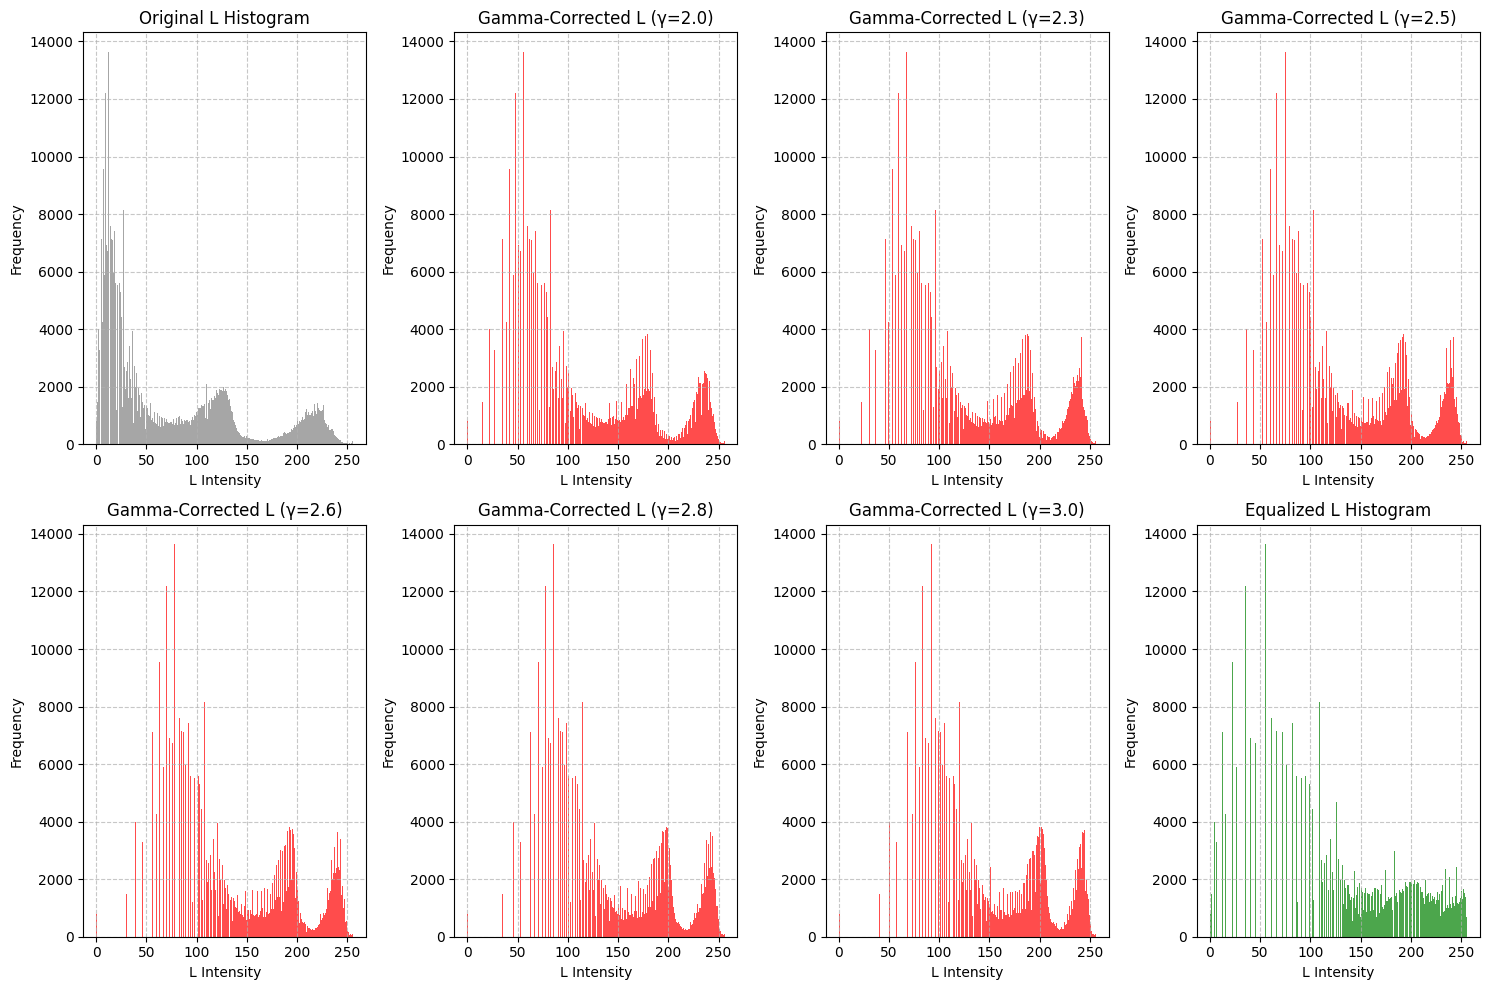

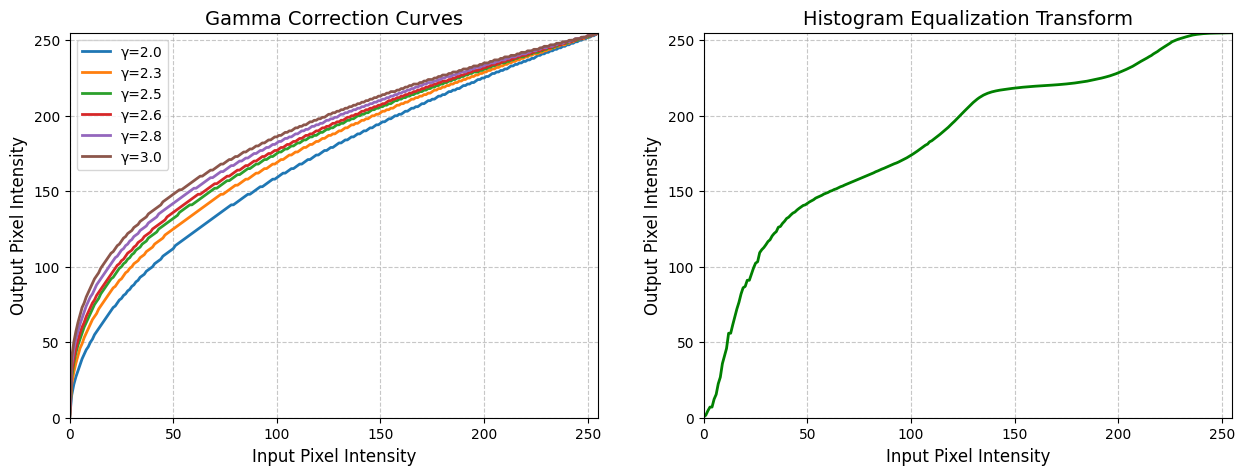

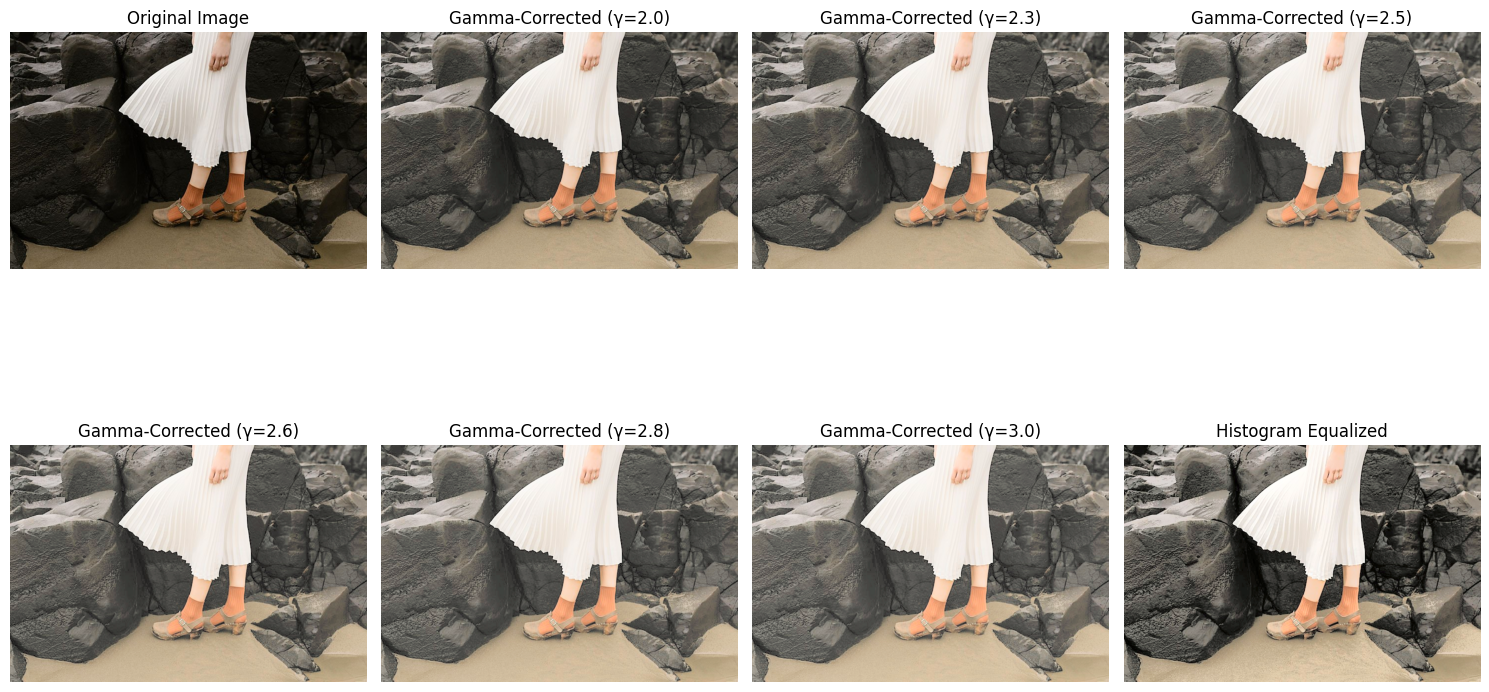

In [31]:
# Define input intensities for gamma correction LUTs
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)

# Define gamma values to test for histogram flattening
gamma_values = [2.0, 2.3, 2.5, 2.6, 2.8, 3.0]  # Test for shadows (γ<1) and highlights (γ>1)
gamma_luts = []
l_gamma_corrected = []
for gamma in gamma_values:
    lut = 255 * np.power(input_intensities / 255.0, 1.0 / gamma)  # Gamma correction formula
    lut = np.clip(lut, 0, 255).astype(np.uint8)  # Clip to valid range
    gamma_luts.append(lut)
    l_gamma_corrected.append(cv.LUT(l_original, lut))  # Apply gamma correction to L channel
    print(f"Gamma LUT Shape (γ={gamma}): {lut.shape}")

# Apply histogram equalization for reference
l_equalized = cv.equalizeHist(l_original)  # Equalize L channel to flatten histogram

# Plot histograms of original, gamma-corrected, and equalized L channels
plt.figure(figsize=(15, 10))
# Original L histogram
plt.subplot(241)
plt.hist(l_original.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel("L Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Original L Histogram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Gamma-corrected histograms
for i, gamma in enumerate(gamma_values):
    plt.subplot(242 + i)
    plt.hist(l_gamma_corrected[i].ravel(), bins=256, range=[0, 256], color='blue' if gamma < 1 else 'red', alpha=0.7)
    plt.xlabel("L Intensity", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.title(f"Gamma-Corrected L (γ={gamma})", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
# Equalized L histogram
plt.subplot(248)
plt.hist(l_equalized.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.xlabel("L Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Equalized L Histogram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('q3_l_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot transformation curves for gamma corrections and equalization
plt.figure(figsize=(15, 5))
# Gamma correction curves
plt.subplot(121)
for i, gamma in enumerate(gamma_values):
    plt.plot(input_intensities, gamma_luts[i], label=f'γ={gamma}', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Gamma Correction Curves", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
# Equalization transformation curve
hist, bins = np.histogram(l_original.ravel(), bins=256, range=[0, 256])
cdf = hist.cumsum()  # Compute cumulative distribution function
cdf_normalized = cdf * 255 / cdf[-1]  # Normalize to [0, 255]
plt.subplot(122)
plt.plot(input_intensities, cdf_normalized, color='green', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title("Histogram Equalization Transform", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q3_transform_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Reconstruct LAB images with gamma-corrected and equalized L channels
lab_gamma_corrected = []
rgb_gamma_corrected = []
for i, l in enumerate(l_gamma_corrected):
    lab = cv.merge([l, a_channel, b_channel])  # Merge gamma-corrected L with A, B
    bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)  # Convert LAB to BGR
    rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)  # Convert to RGB
    lab_gamma_corrected.append(lab)
    rgb_gamma_corrected.append(rgb)
    cv.imwrite(f'q3_gamma_{gamma_values[i]}.jpg', bgr)  # Save gamma-corrected image
lab_equalized = cv.merge([l_equalized, a_channel, b_channel])  # Merge equalized L with A, B
bgr_equalized = cv.cvtColor(lab_equalized, cv.COLOR_LAB2BGR)  # Convert LAB to BGR
rgb_equalized = cv.cvtColor(bgr_equalized, cv.COLOR_BGR2RGB)  # Convert to RGB
cv.imwrite('q3_equalized.jpg', bgr_equalized)  # Save equalized image

# Visualize original, gamma-corrected, and equalized images
plt.figure(figsize=(15, 10))
# Original image
plt.subplot(241)
plt.imshow(img_q3_rgb)
plt.title("Original Image", fontsize=12)
plt.axis('off')
# Gamma-corrected images
for i, gamma in enumerate(gamma_values):
    plt.subplot(242 + i)
    plt.imshow(rgb_gamma_corrected[i])
    plt.title(f"Gamma-Corrected (γ={gamma})", fontsize=12)
    plt.axis('off')
# Equalized image
plt.subplot(248)
plt.imshow(rgb_equalized)
plt.title("Histogram Equalized", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.savefig('q3_image_results.png', dpi=300, bbox_inches='tight')
plt.show()

Gamma LUT Shape (γ=2.5): (256,)


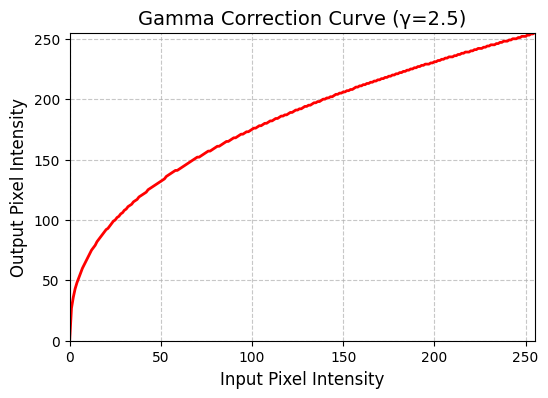

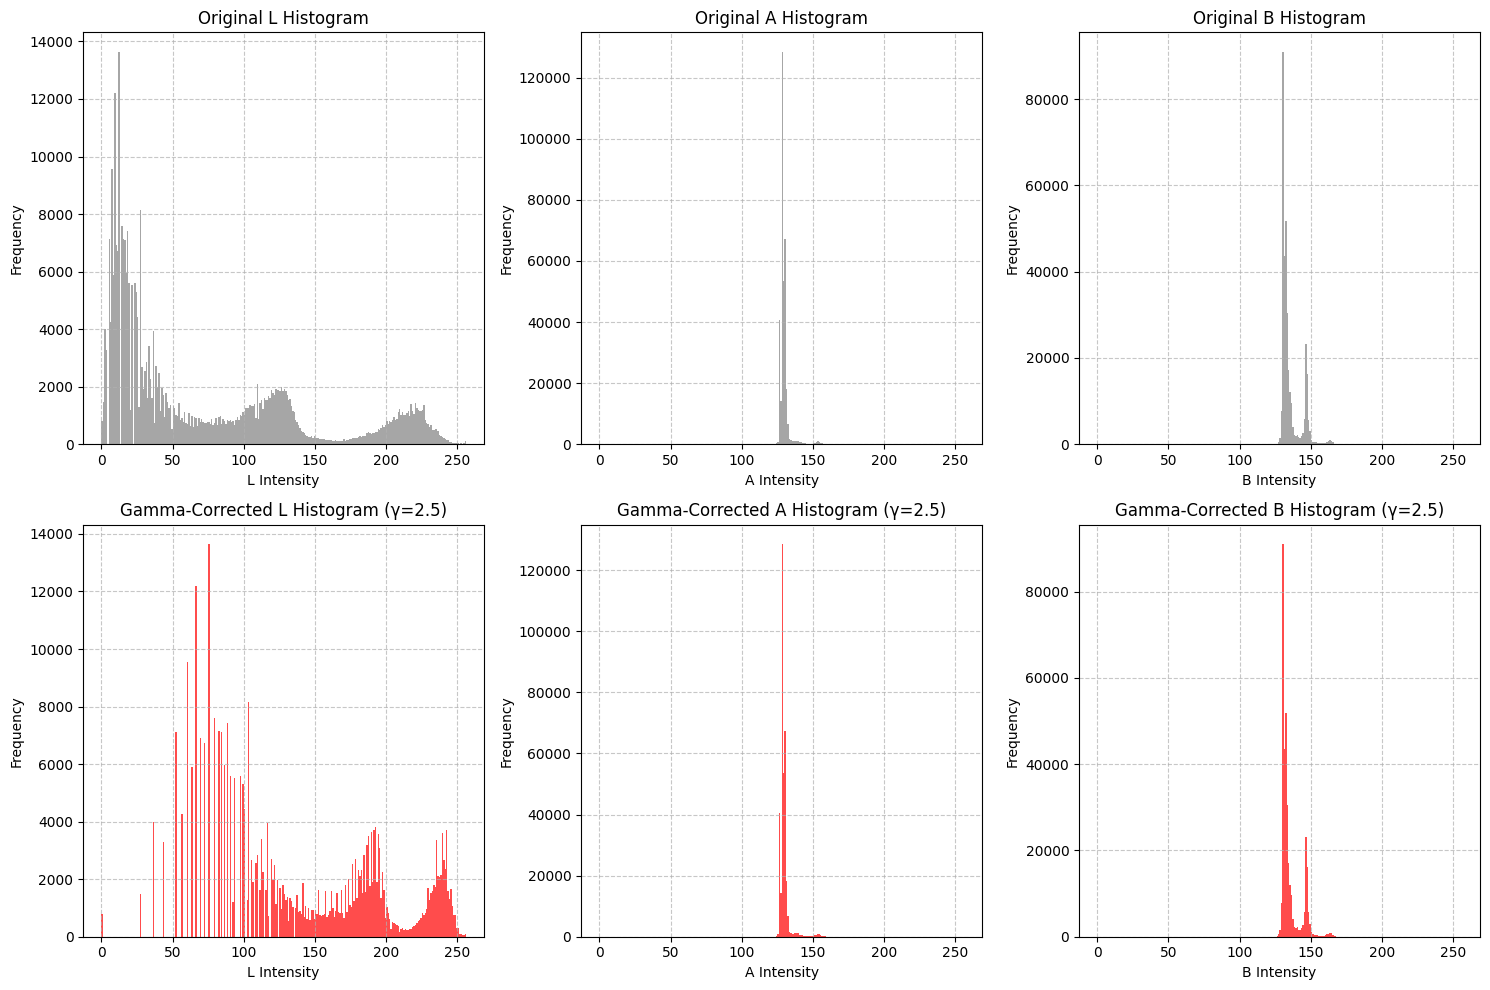

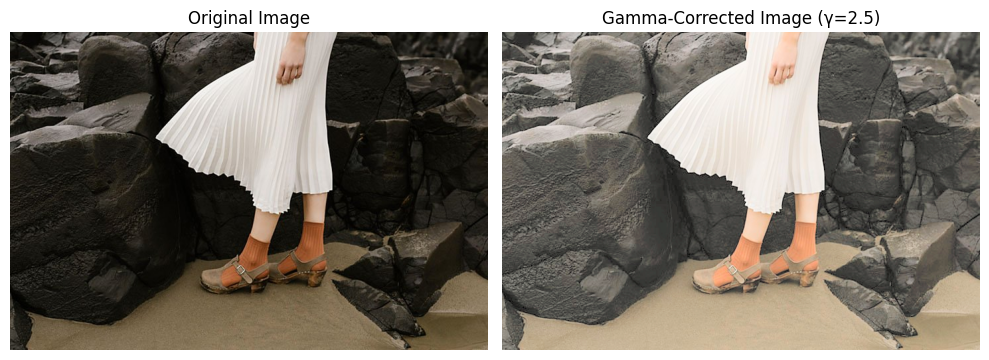

In [34]:
#Comparison with finalized gamma value
# Define gamma correction with γ = 2.5
gamma = 2.5  # Specified gamma value to enhance highlights
input_intensities = np.linspace(0, 255, 256)  # Input intensities (0-255)
gamma_lut = 255 * np.power(input_intensities / 255.0, 1.0 / gamma)  # Gamma correction formula
gamma_lut = np.clip(gamma_lut, 0, 255).astype(np.uint8)  # Clip to valid range [0, 255]
print(f"Gamma LUT Shape (γ={gamma}): {gamma_lut.shape}")

# Apply gamma correction to L channel
l_gamma = cv.LUT(l_original, gamma_lut)  # Apply γ=2.5 to L channel

# Reconstruct LAB image with gamma-corrected L channel
lab_gamma = cv.merge([l_gamma, a_channel, b_channel])  # Merge gamma-corrected L with original A, B
bgr_gamma = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)  # Convert LAB to BGR
rgb_gamma = cv.cvtColor(bgr_gamma, cv.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Extract A, B channels from gamma-corrected LAB image (should be identical to original A, B)
_, a_gamma, b_gamma = cv.split(lab_gamma)  # Split gamma-corrected LAB image

# Plot transformation curve for gamma correction
plt.figure(figsize=(6, 4))
plt.plot(input_intensities, gamma_lut, color='red', linewidth=2)
plt.xlabel("Input Pixel Intensity", fontsize=12)
plt.ylabel("Output Pixel Intensity", fontsize=12)
plt.title(f"Gamma Correction Curve (γ={gamma})", fontsize=14)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('q3_gamma_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot histograms for L, A, B channels of original and gamma-corrected images
plt.figure(figsize=(15, 10))
# Original L histogram
plt.subplot(231)
plt.hist(l_original.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel("L Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Original L Histogram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Gamma-corrected L histogram
plt.subplot(234)
plt.hist(l_gamma.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.xlabel("L Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title(f"Gamma-Corrected L Histogram (γ={gamma})", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Original A histogram
plt.subplot(232)
plt.hist(a_channel.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel("A Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Original A Histogram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Gamma-corrected A histogram
plt.subplot(235)
plt.hist(a_gamma.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.xlabel("A Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title(f"Gamma-Corrected A Histogram (γ={gamma})", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Original B histogram
plt.subplot(233)
plt.hist(b_channel.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.xlabel("B Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Original B Histogram", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# Gamma-corrected B histogram
plt.subplot(236)
plt.hist(b_gamma.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.xlabel("B Intensity", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title(f"Gamma-Corrected B Histogram (γ={gamma})", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('q3_lab_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

# Save gamma-corrected image
cv.imwrite('q3_gamma_2.5.jpg', bgr_gamma)  # Save gamma-corrected image

# Visualize original and gamma-corrected images side by side
plt.figure(figsize=(10, 5))
# Original image
plt.subplot(121)
plt.imshow(img_q3_rgb)
plt.title("Original Image", fontsize=12)
plt.axis('off')
# Gamma-corrected image
plt.subplot(122)
plt.imshow(rgb_gamma)
plt.title(f"Gamma-Corrected Image (γ={gamma})", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.savefig('q3_image_results.png', dpi=300, bbox_inches='tight')
plt.show()